In [1]:
import importlib, match, cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import mediapipe as mp
importlib.reload(match)

mp_pose = mp.solutions.pose
pose_landmark = mp_pose.PoseLandmark
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

In [17]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

frame = frame[-480:, -int(480/1.7):]
print(frame.shape)
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()
cv2.imshow('BlazePose', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

(480, 282, 3)


In [10]:
action = match.read_video('weizhi.mp4')[:300]
target = match.read_video('weien.mp4')[:300]
w, h = action[0].shape[1]//2, action[0].shape[0]//2
print(w, h)

954
931
360 640


In [8]:
print((len(action), len(target)))

(300, 300)


In [3]:
result1 = match.detect_pose(action)
result2 = match.detect_pose(target)

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\fudan\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|██████████| 300/300 [00:11<00:00, 25.21it/s]


In [40]:
for i in tqdm(result1):
    match.match(i, i, w, h)

100%|██████████| 300/300 [00:00<00:00, 5557.53it/s]


In [67]:
id1, id2 = 0, 20
match.match(result1[id1], result2[id2], w, h)

0.8136836484918739

In [78]:
match.match_batch(result1[:15], result2[:15], w, h)

1.0345338789818759

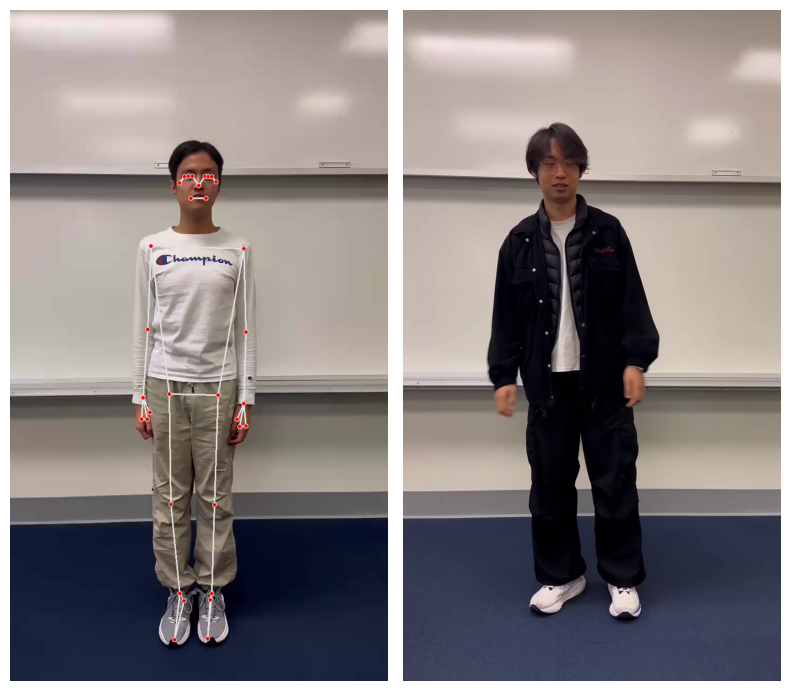

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [79]:
list(pose_landmark)

[<PoseLandmark.NOSE: 0>,
 <PoseLandmark.LEFT_EYE_INNER: 1>,
 <PoseLandmark.LEFT_EYE: 2>,
 <PoseLandmark.LEFT_EYE_OUTER: 3>,
 <PoseLandmark.RIGHT_EYE_INNER: 4>,
 <PoseLandmark.RIGHT_EYE: 5>,
 <PoseLandmark.RIGHT_EYE_OUTER: 6>,
 <PoseLandmark.LEFT_EAR: 7>,
 <PoseLandmark.RIGHT_EAR: 8>,
 <PoseLandmark.MOUTH_LEFT: 9>,
 <PoseLandmark.MOUTH_RIGHT: 10>,
 <PoseLandmark.LEFT_SHOULDER: 11>,
 <PoseLandmark.RIGHT_SHOULDER: 12>,
 <PoseLandmark.LEFT_ELBOW: 13>,
 <PoseLandmark.RIGHT_ELBOW: 14>,
 <PoseLandmark.LEFT_WRIST: 15>,
 <PoseLandmark.RIGHT_WRIST: 16>,
 <PoseLandmark.LEFT_PINKY: 17>,
 <PoseLandmark.RIGHT_PINKY: 18>,
 <PoseLandmark.LEFT_INDEX: 19>,
 <PoseLandmark.RIGHT_INDEX: 20>,
 <PoseLandmark.LEFT_THUMB: 21>,
 <PoseLandmark.RIGHT_THUMB: 22>,
 <PoseLandmark.LEFT_HIP: 23>,
 <PoseLandmark.RIGHT_HIP: 24>,
 <PoseLandmark.LEFT_KNEE: 25>,
 <PoseLandmark.RIGHT_KNEE: 26>,
 <PoseLandmark.LEFT_ANKLE: 27>,
 <PoseLandmark.RIGHT_ANKLE: 28>,
 <PoseLandmark.LEFT_HEEL: 29>,
 <PoseLandmark.RIGHT_HEEL: 30>,
 <P